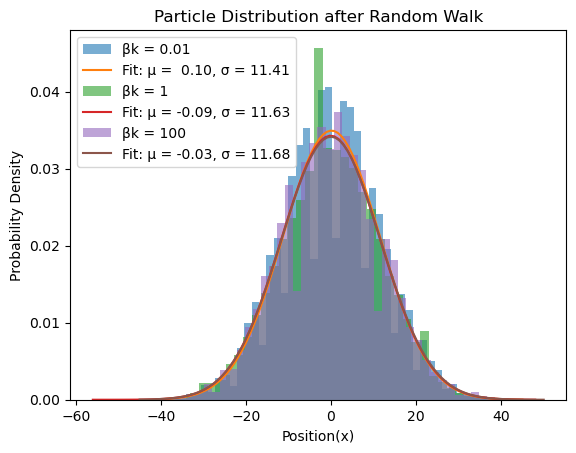

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

particles_num = 10000
steps_num = 200
b_k_values = [0.01, 1, 100]

def V(x):
    return 1

def compute_probabilities(beta, x):
    p_plus = 1/ (1 + np.exp(-beta * (V(x - 1) - V(x + 1))) + np.exp(-beta * (V(x) - V(x + 1))))
    p_zero = 1/ (1 + np.exp(-beta * (V(x - 1) -V(x))) + np.exp(-beta * (V(x+1) - V(x))))
    p_minus = 1/ (1 + np.exp(-beta * (V(x + 1) -V(x - 1))) + np.exp(-beta * (V(x) - V(x - 1))))
    return p_plus, p_zero, p_minus

for b_k in b_k_values:
    p_plus, p_zero, p_minus = compute_probabilities(b_k, 1)

    positions = np.zeros(particles_num, dtype = int)

    for i in range(steps_num):
        rand_vals = np.random.rand(particles_num)
        positions += np.where(rand_vals < p_minus, -1, 0)
        positions += np.where(rand_vals > (1-p_plus), 1, 0)

    mu, sigma = norm.fit(positions)
    plt.hist(positions, bins= 50, density=True, alpha = 0.6, label=f"βk = {b_k}")

    x = np.linspace(min(positions), max(positions), 100)
    plt.plot(x, norm.pdf(x, mu, sigma), label=f"Fit: μ = {mu: .2f}, σ ={sigma: .2f}")

plt.xlabel("Position(x)")
plt.ylabel("Probability Density")
plt.title("Particle Distribution after Random Walk")
plt.legend()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

particles_num = 10000
steps_num = 200
b_k_values = [0.01, 1, 100]

def V(x):
    return -k * x

def compute_probabilities(beta, x):
    p_plus = 1/ (1 + np.exp(-beta * (V(x - 1) - V(x + 1))) + np.exp(-beta * (V(x) - V(x + 1))))
    p_zero = 1/ (1 + np.exp(-beta * (V(x - 1) -V(x))) + np.exp(-beta * (V(x+1) - V(x))))
    p_minus = 1/ (1 + np.exp(-beta * (V(x + 1) -V(x - 1))) + np.exp(-beta * (V(x) - V(x - 1))))
    return p_plus, p_zero, p_minus

for b_k in b_k_values:
    p_plus, p_zero, p_minus = compute_probabilities(b_k, 1)

    positions = np.zeros(particles_num, dtype = int)

    for i in range(steps_num):
        rand_vals = np.random.rand(particles_num)
        positions += np.where(rand_vals < p_minus, -1, 0)
        positions += np.where(rand_vals > (1-p_plus), 1, 0)

    mu, sigma = norm.fit(positions)
    plt.hist(positions, bins= 50, density=True, alpha = 0.6, label=f"βk = {b_k}")

    x = np.linspace(min(positions), max(positions), 100)
    plt.plot(x, norm.pdf(x, mu, sigma), label=f"Fit: μ = {mu: .2f}, σ ={sigma: .2f}")

plt.xlabel("Position(x)")
plt.ylabel("Probability Density")
plt.title("Particle Distribution after Random Walk")
plt.legend()
plt.show()